# Setup

In [ ]:
%pip install -U "unstructured[all-docs]" pillow lxml pillow
%pip install -U chromadb tiktoken
%pip install -U langchain langchain-community langchain-openai langchain-groq
%pip install -U python_dotenv
%pip install -U langchain-ollama
%pip install -U transformers 
%pip install -qU "langchain-chroma>=0.1.2"
%pip install -qU langchain-openai
%pip install PyMuPDF

In [45]:
from dotenv import load_dotenv 
load_dotenv()

True

# Data Extraction from PDF

## Partition PDF tables, text, and images

In [46]:
from unstructured.partition.pdf import partition_pdf

output_path = "./pdf/"
file_path = output_path + 'attention_is_all_you_need.pdf'

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

python(56933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56936) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56941) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56942) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56943) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56944) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56945) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56946) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56951) Malloc

In [47]:
len(chunks)

17

In [48]:
[str(type(x)) for x in chunks]

["<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.ele

In [49]:
#the valuable data tables and compositeElement
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>"}

In [50]:
chunks[0].metadata.orig_elements

In [51]:
chunks[0].metadata.orig_elements[0].to_dict()

{'type': 'UncategorizedText',
 'element_id': '93598c1d-8aea-4a6e-a588-a701c994e3c3',
 'text': '3',
 'metadata': {'coordinates': {'points': ((45.388888888888886,
     594.2222222222224),
    (45.388888888888886, 622.0000000000002),
    (100.94444444444446, 622.0000000000002),
    (100.94444444444446, 594.2222222222224)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-12-10T22:44:55',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1}}

In [52]:
chunks[1].to_dict()

{'type': 'CompositeElement',
 'element_id': '5a3e981e1ccbcfcbdfd38d2806041c18',
 'text': '1 Introduction\n\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38, 24, 15].\n\nRecurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across exampl

In [53]:
elements = chunks [3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'ede62b55-8cc1-474d-b17e-b32f6c957595',
 'text': 'Scaled Dot-Product Attention  Multi-Head Attention ',
 'metadata': {'detection_class_prob': 0.8599750995635986,
  'coordinates': {'points': ((410.50833333333327, 197.0675599999999),
    (410.50833333333327, 669.3112182617188),
    (1311.755126953125, 669.3112182617188),
    (1311.755126953125, 197.0675599999999)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-12-10T22:44:55',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHYA4UDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpT

## Separte the Text, Tables and Images

In [54]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [55]:
tables[0].to_dict()

{'type': 'Table',
 'element_id': '9f5d75a8d5003569dc2a3c1891278920',
 'text': 'Layer Type Complexity per Layer Sequential Maximum Path Length Operations Self-Attention O(n2 · d) O(1) O(1) Recurrent O(n · d2) O(n) O(n) Convolutional O(k · n · d2) O(1) O(logk(n)) Self-Attention (restricted) O(r · n · d) O(1) O(n/r)',
 'metadata': {'last_modified': '2024-12-10T22:44:55',
  'text_as_html': '<table><tr><td>Layer Type</td><td>Complexity per Layer</td><td>Sequential Operations</td><td>Maximum Path Length</td></tr><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>O(n)</td></tr><tr><td>Convolutional</td><td>O(k-n-d?)</td><td>O(1)</td><td>O(logy(n))</td></tr><tr><td>Self-Attention (restricted)</td><td>O(r-n-d)</td><td>ol)</td><td>O(n/r)</td></tr></table>',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 6,
  'orig_elements': 'eJxtU11vozAQ/CsWTz0pBHAgKVHU6tTXVo2ufUsjZGATrBibg+UuqOp/vzX5KMnl

In [56]:
tables[0].metadata.text_as_html

'<table><tr><td>Layer Type</td><td>Complexity per Layer</td><td>Sequential Operations</td><td>Maximum Path Length</td></tr><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>O(n)</td></tr><tr><td>Convolutional</td><td>O(k-n-d?)</td><td>O(1)</td><td>O(logy(n))</td></tr><tr><td>Self-Attention (restricted)</td><td>O(r-n-d)</td><td>ol)</td><td>O(n/r)</td></tr></table>'

In [57]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

## Display Image

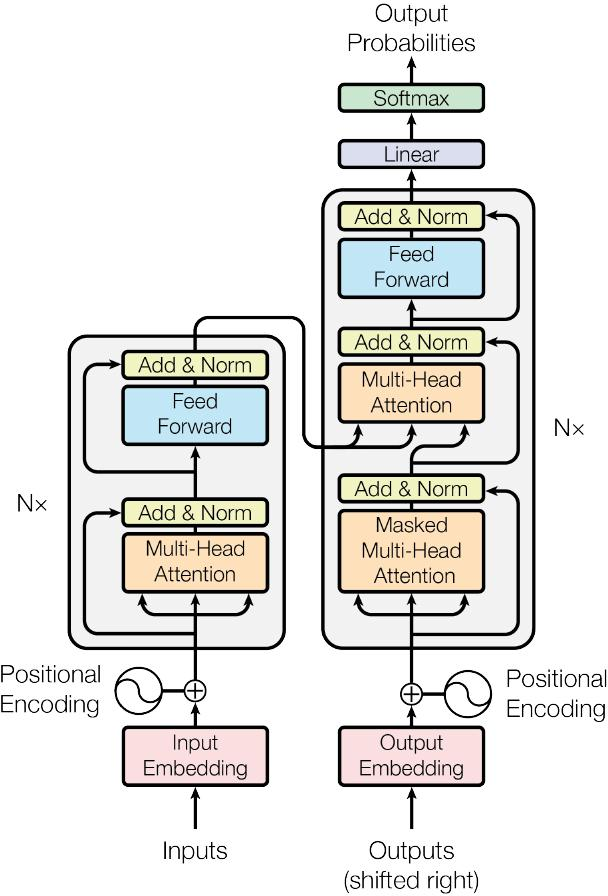

In [58]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

# Summary of the Data

## Text and Table Summaries

In [18]:
%pip install -qU langchain-groq

python(56179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [59]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_ollama.llms import OllamaLLM
from langchain_groq import ChatGroq
import os

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)




model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
)


# Summary chain
# model = OllamaLLM(temperature=0.5, model="llama3.1:8b")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [28]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [60]:
text_summaries

['The Transformer model, proposed by Google Brain, is a simple network architecture based on attention mechanisms, replacing recurrence and convolutions. It achieves state-of-the-art results in machine translation tasks, including a 28.4 BLEU score on English-to-German and 41.8 BLEU score on English-to-French, and generalizes well to other tasks like English constituency parsing.',
 'Recurrent neural networks have been established as state of the art in sequence modeling and transduction problems, but their sequential nature limits parallelization and memory constraints. Attention mechanisms have improved sequence modeling, but are often used with recurrent networks. This work proposes the Transformer, a model architecture that relies entirely on attention mechanisms to draw global dependencies, allowing for more parallelization and reaching a new state of the art in translation quality.',
 'The Transformer model architecture consists of an encoder and decoder with stacked self-attenti

In [61]:
table_summaries

['The table compares four neural network layer types: Self-Attention, Recurrent, Convolutional, and Self-Attention (restricted). Key differences include complexity per layer, sequential operations, and maximum path length, with Self-Attention being the most efficient and Convolutional having the longest maximum path length.',
 'The table compares various machine translation models, including ByteNet, Deep-Att + PosUnk, GNMT + RL, ConvS2S, MoE, and Transformer, across different metrics such as BLEU scores for EN-FR and EN-DE translations, training costs, and computational complexity.',
 'The table appears to be a comparison of different neural network models, specifically Transformer models, with varying parameters such as input size (N), embedding size, and positional encoding methods. The results show performance metrics (accuracy, perplexity) for each model, with some models achieving better results than others.',
 'The table compares parser performance on the WSJ 23 F1 dataset, with

## Image Summaries

In [62]:
from langchain_openai import OpenAI


from langchain_openai import ChatOpenAI

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the transformers
                  architecture. Be specific about graphs, such as bar plots."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


image_summaries = chain.batch(images)


In [63]:
image_summaries

['The image illustrates the architecture of a Transformer model, commonly used in natural language processing. It is divided into two main sections: the encoder on the left and the decoder on the right, with arrows indicating the flow of data.\n\n### Encoder (Left Side):\n- **Inputs**: The process starts with the "Inputs" node at the bottom, which connects to "Input Embedding" and then to "Positional Encoding." This suggests that each input is transformed into a vector representation, incorporating positional information.\n- **Layers (Nx)**: The encoder consists of multiple identical layers (indicated by \'Nx\'), each containing the following components:\n  - **Multi-Head Attention**: This block allows the model to focus on different parts of the input sequence simultaneously.\n  - **Add & Norm**: After the attention mechanism, the output is processed through an addition and normalization step.\n  - **Feed Forward**: A feed-forward neural network processes the data further.\n  - Anothe

## Vetor Storage

## Creation of vector Store

In [33]:
import uuid
from langchain_chroma import Chroma
from langchain.storage import InMemoryStore
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

## Load the summaries and link the to the original data

In [34]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

## Retrivel Analysis

In [35]:
chunks = retriever.invoke(
    "what is multihead attention"
)

In [36]:
chunks

 '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHYA4UDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0KHxFq3ifxxrmhaVqMGmW2iiJZHMAlluJHBJwGOFRcY6ZOeorS8O3/iQeKdV0nxA1nJFDbwy2U9rEYxKpZw5YFjhuFBGcDt1rnfGfw4vr7XT4v8F6t/Z2v7cSLn91c4GMHqAcAA5BBwM461N4F+JFxrI1XS/EenGw8QaPE0

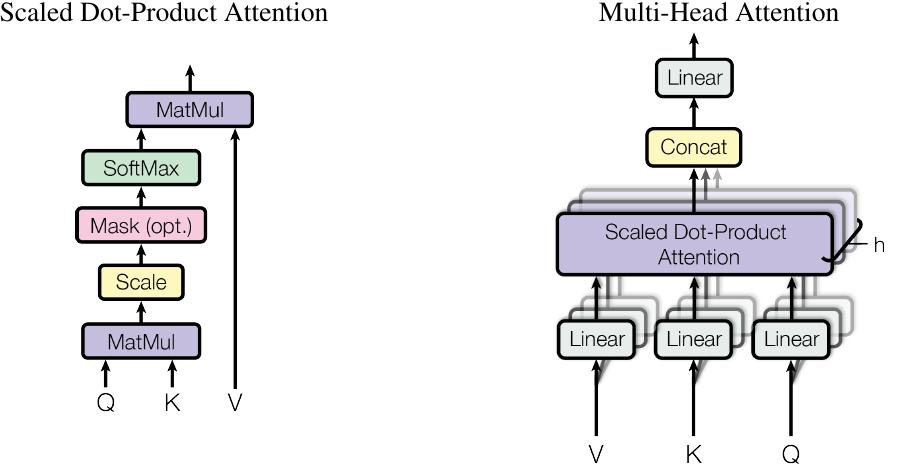

In [37]:

display_base64_image(chunks[1])

In [38]:
for chunk in chunks:
    print(chunk)

3.2.2 Multi-Head Attention

Instead of performing a single attention function with dmodel-dimensional keys, values and queries, we found it beneficial to linearly project the queries, keys and values h times with different, learned linear projections to dk, dk and dv dimensions, respectively. On each of these projected versions of queries, keys and values we then perform the attention function in parallel, yielding dv-dimensional

‘To illustrate why the dot products get large, assume that the components of q and k are independent random variables with mean 0 and variance 1. Then their dot product, g -k = ves, qiki, has mean 0 and variance dx.

4

output values. These are concatenated and once again projected, resulting in the final values, as depicted in Figure 2.

Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. With a single attention head, averaging inhibits this.

MultiHead(Q, K, V ) = Concat(head

In [39]:
for i, chunk in enumerate(chunks):
    if "CompositeElement" in str(type(chunk)):
        print("\n\nChunk", i)
        for doc in chunk.metadata.orig_elements:
            print(doc.to_dict()["type"], doc.metadata.page_number)



Chunk 0
Title 4
NarrativeText 4
NarrativeText 4
UncategorizedText 4
NarrativeText 5
NarrativeText 5
Formula 5
NarrativeText 5
NarrativeText 5
Title 5
NarrativeText 5
ListItem 5
ListItem 5
ListItem 5


Chunk 2
Title 2
NarrativeText 2
NarrativeText 2
NarrativeText 2
NarrativeText 2
Title 2
NarrativeText 2
NarrativeText 2
NarrativeText 2
NarrativeText 2


Chunk 3
Title 3
NarrativeText 3
Footer 3
Image 4
Image 4
NarrativeText 4
NarrativeText 4
Title 4
NarrativeText 4
NarrativeText 4
Formula 4
NarrativeText 4
NarrativeText 4


In [40]:
import fitz
import matplotlib.patches as pataches
import matplotlib.pyplot as plt
from PIL import Image

def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes('RGB', [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categorites = set()
    category_to_color = {
        'Title': 'orchid',
        'Image':'forestgreen',
        'Table':'tomato',
    }

    for segment in segments:
        points = segment['coordinates']['points']
        layout_width = segment["coordinates"]['layout_width']
        layout_height = segment['coordinates']['layout_height']
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment['category'], 'deepskyblue')
        categorites.add(segment['category'])
        rect = pataches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor='none'
        )
        ax.add_patch(rect)
    
    #Legend
    legend_handles = [pataches.Patch(color='deepskyblue', label='Text')]
    for category in ['Title', 'Image', 'Table']:
        if category in categorites:
            legend_handles.append(
                pataches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis('off')
    ax.legend(handles=legend_handles, loc='upper right')
    plt.tight_layout()
    plt.show()

def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get('page_number') == page_number
    ]
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page=pdf_page, segments=segments)
    if print_text:
        for doc in page_docs:
            print(f'{doc.page_content}\n')


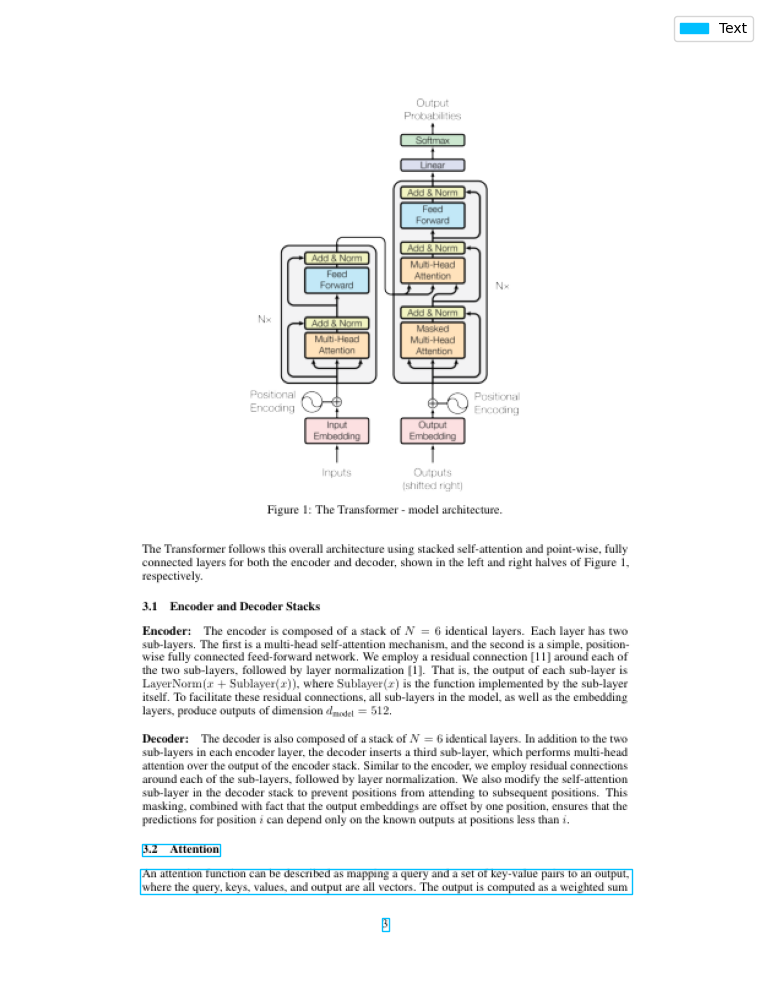

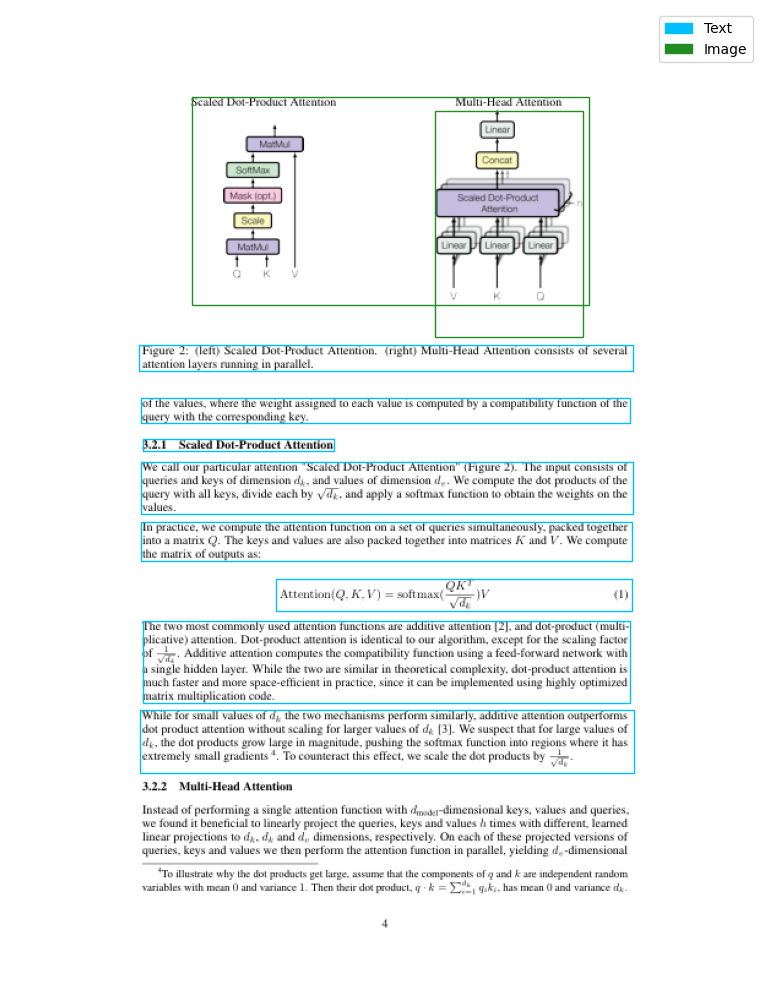

In [41]:
from langchain_core.documents import Document
def extract_page_numbers_from_chunk(chunk):
    elements = chunk.metadata.orig_elements
    
    page_numbers = set()
    for element in elements:
        page_numbers. add (element.metadata.page_number)
    return page_numbers


def display_chunk_pages (chunk):
    page_numbers = extract_page_numbers_from_chunk(chunk)
    docs = []
    for element in chunk.metadata.orig_elements:
        metadata = element.metadata.to_dict()
        if "Table" in str(type (element)):
            metadata ["category"] = "Table"
        elif "Image" in str(type(element) ):
            metadata ["category"] = "Image"
        else:
            metadata ["category"] = "Text"
        metadata ["page_number"] = int (element.metadata.page_number)

        docs. append (Document( page_content=element.text, metadata=metadata))
    
    for page_number in page_numbers:
        render_page(docs, page_number, False)


extract_page_numbers_from_chunk(chunks[3])
display_chunk_pages(chunks[3])

# RAG Pipeline

In [42]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [43]:
response = chain.invoke(
    "What is the attention mechanism?"
)

print(response)

The attention mechanism is a process that maps a query and a set of key-value pairs to an output, where all components (queries, keys, values, and the output) are represented as vectors. The output is computed as a weighted sum of the values, with weights determined by a compatibility function between the query and the corresponding keys. 

In the context of the scaled dot-product attention, the attention function is defined as:

\[ \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V \]

This means that the dot products of the query and key vectors are scaled by the square root of the dimension of the keys (\(d_k\)) to prevent excessively large values that could affect the softmax function's gradients. The resulting weights are then used to compute a weighted sum of the values.

Additionally, multi-head attention extends this concept by performing multiple attention operations in parallel with different linear projections of the queries, keys, and values, al

In [ ]:
response = chain_with_sources.invoke(
    "What is multihead?"
)

print("Response:", response['response'])

#Context 

# print("\n\nContext:")
# for text in response['context']['texts']:
#     print(text.text)
#     print("Page number: ", text.metadata.page_number)
#     print("\n" + "-"*50 + "\n")

for image in response['context']['images']:
    display_base64_image(image)

#                                                                  THANK YOU!